<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2005%20Lab%2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


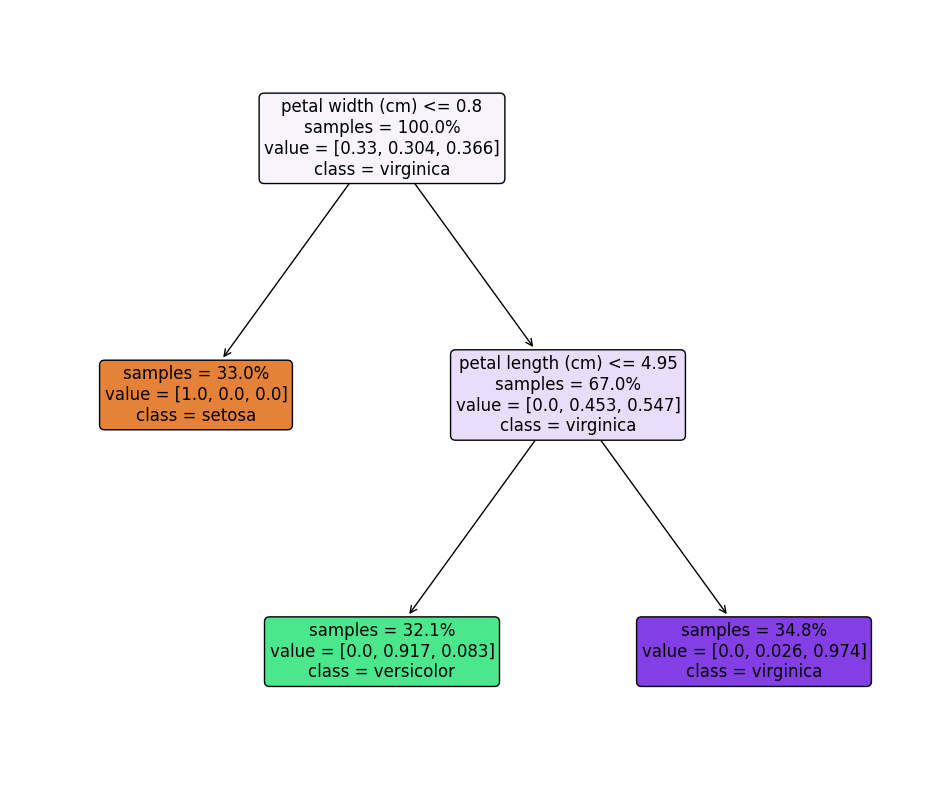

In [4]:
giveAnExample(2)

In [5]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


Accuracy of the decision tree on the test set: 

0.579


Here is a diagram of the tree created to evaluate each sample:


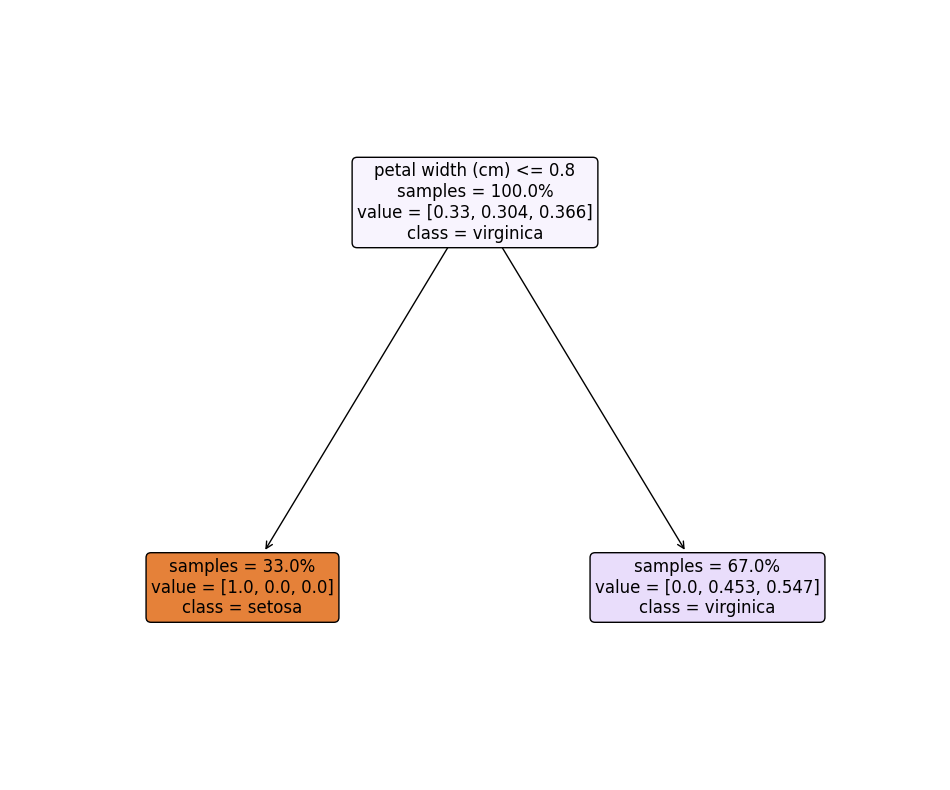

In [20]:
giveAnExample(1)

Excercise 1- The above tree has an accuracy of 0.579 and only two out of four classes are classified.

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


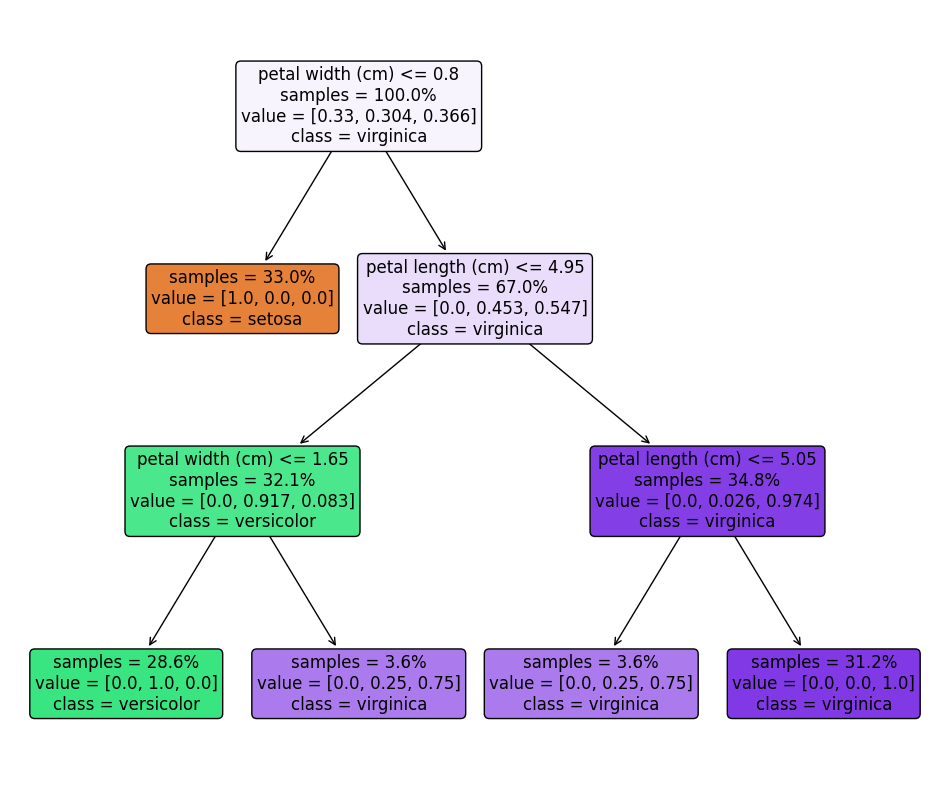

In [6]:
giveAnExample(3)

Excercise 2- The accuracy is 0.974 and the tree uses only two of them to classify the cases of species.

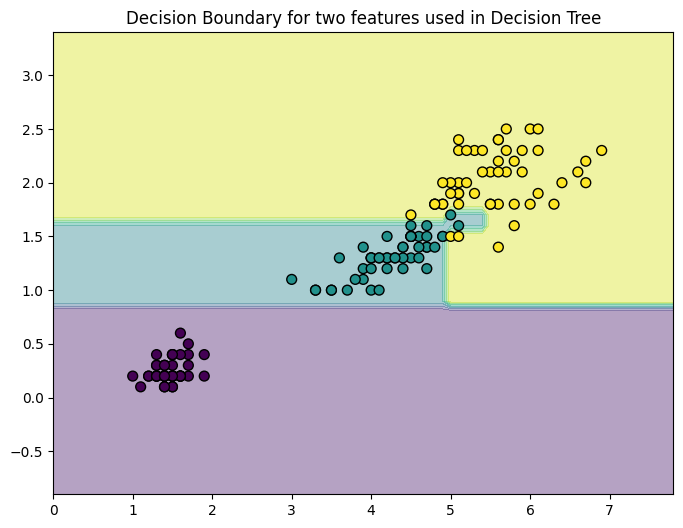

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 10)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

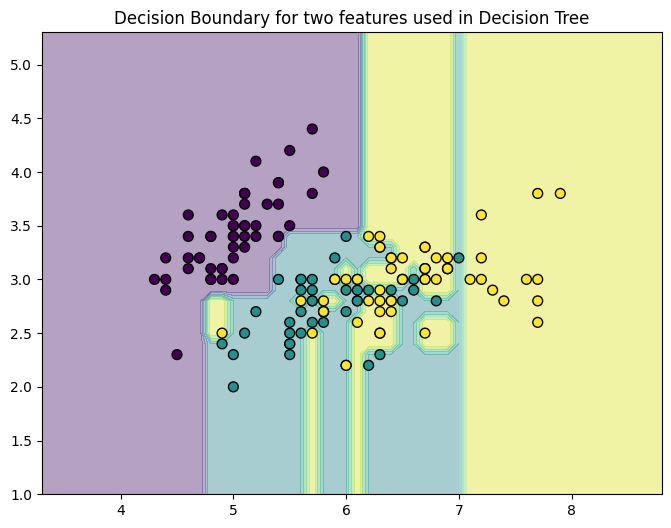

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 10)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

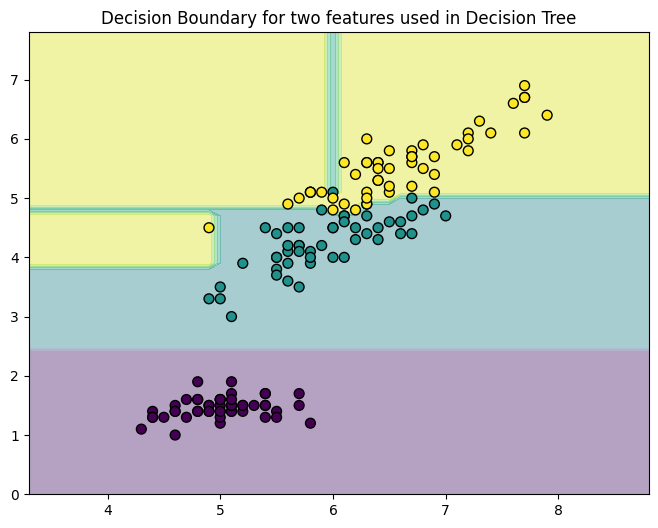

In [11]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 10)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

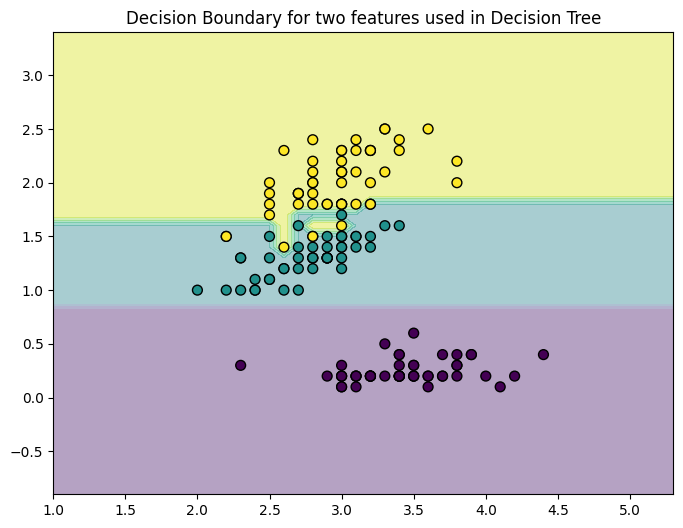

In [12]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 10)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Exercise 3:

3.1 : Observations-

2: Decision trees at this depth can only make one split per feature. It  may not capture complex relationships in the data.

5: The decision tree can make multiple splits per feature. The decision boundaries become more flexible and can capture more complex patterns in the data.

10: The decision boundaries are even more flexible and intricate. The decision tree can create highly nonlinear decision boundaries, capturing complex interactions and patterns in the data.


3.2 :

The reason why decision boundaries in decision trees tend to align with the axes of the feature space, forming right angles, is due to the nature of how decisions are made at each node in the tree. In a decision tree, at each internal node, a decision is made based on a single feature and a threshold value for that feature. When a decision is made at any node, it effectively splits the feature space into two regions along the axis of the chosen feature.


Exercise 4:


In [14]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:

    if petal_length <= 2.45:
        if petal_width <= 1.75:
            return "Iris-setosa"
        else:
            if sepal_length <= 5.05:
                return "Iris-versicolor"
            else:
                return "Iris-virginica"
    else:
        if petal_width <= 1.55:
            if sepal_length <= 6.05:
                return "Iris-virginica"
            else:
                return "Iris-versicolor"
        else:
            if sepal_length <= 6.05:
                return "Iris-virginica"
            else:
                return "Iris-versicolor"

sepal_width = 3.4
sepal_length = 4.5
petal_width = 1.3
petal_length = 2.6

predicted_species = predictSpecies(sepal_width, sepal_length, petal_width, petal_length)
print("Predicted species:", predicted_species)


Predicted species: Iris-virginica


In [15]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


Exercise 5:



In [18]:
from collections import Counter
import math

def entropy(labels):
    label_counts = Counter(labels)
    num_labels = len(labels)
    entropy_val = 0.0

    for label in label_counts:
        label_prob = label_counts[label] / num_labels
        entropy_val -= label_prob * math.log2(label_prob)

    return entropy_val

labels = ['1', '2', '2', '0', '2', '1', '0', '1', '0', '1']


entropy_value = entropy(labels)
print("Entropy:", entropy_value)


Entropy: 1.5709505944546684


Exercise 6:


In [19]:
feature_index = 2  # Petal length is at index 2
feature_values = X[:, feature_index]
threshold = 2.5

group1_indices = np.where(feature_values <= threshold)[0]
group2_indices = np.where(feature_values > threshold)[0]

group1_labels = y[group1_indices]
group2_labels = y[group2_indices]

# Calculate the entropy of the entire dataset
def entropy(labels):
    label_counts = np.bincount(labels)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Adding a small value to avoid log(0)
    return entropy

entropy_full = entropy(y)

# Calculate the entropy of each group
entropy_group1 = entropy(group1_labels)
entropy_group2 = entropy(group2_labels)

# Calculate the information gain
num_samples_group1 = len(group1_labels)
num_samples_group2 = len(group2_labels)
total_samples = len(y)

info_gain = entropy_full - ((num_samples_group1 / total_samples) * entropy_group1
                            + (num_samples_group2 / total_samples) * entropy_group2)

print("Information Gain:", info_gain)


Information Gain: 0.91829583386213
